In [1]:
from collections import Counter
import numpy as np
import csv
train_shape=int(40000/2)
test_shape=int(8000/2)


# vectorize text data based on counting pos and neg words
def count_vectorize(dic,text,length):
    wordcount=Counter(text.split())
    wordvector=[0]*length
    for x in wordcount:
        if x in dic:
            wordvector[dic[x]-1]=wordcount[x]   
    return wordvector 

In [3]:
# main features from full text
    # 1.read data from txt and generate raw train and test data
i=0
X_train_new=[]
for line in open('/Volumes/Zhipeng/patent_dataset/paired_newclaims_dep.txt',encoding='utf-8',errors='ignore'):
    if i%3==1 and len(line)>20:
        X_train_new.append(line)
    i+=1
    
i=0
X_test_new=[]
for line in open('/Volumes/Zhipeng/patent_dataset/1314paired_newclaims_dep.txt',encoding='utf-8',errors='ignore'):
    if i%3==1 and len(line)>20:
        X_test_new.append(line)
    i+=1

i=0
X_train_old=[]
for line in open('/Volumes/Zhipeng/patent_dataset/paired_oldclaims_dep.txt',encoding='utf-8',errors='ignore'):
    if i%3==1 and len(line)>20:
        X_train_old.append(line)
    i+=1
    
i=0
X_test_old=[]
for line in open('/Volumes/Zhipeng/patent_dataset/1314paired_oldclaims_dep.txt'):
    if i%3==1 and len(line)>20:
        X_test_old.append(line)
    i+=1

i=0
X_train_can=[]
for line in open('/Volumes/Zhipeng/patent_dataset/paired_cancledclaims_dep.txt',encoding='utf-8',errors='ignore'):
    if i%3==1 and len(line)>20:
        X_train_can.append(line)
    i+=1

In [4]:
# analyze the number of words in old and new claims    
import statistics  
len_new=[len(line.split()) for line in X_train_new if len(line.split())<1000 and len(line.split())>10]
len_old=[len(line.split()) for line in X_train_old if len(line.split())<1000 and len(line.split())>10]
len_can=[len(line.split()) for line in X_train_can if len(line.split())<1000 and len(line.split())>10]
print(statistics.mean(len_can))
print(statistics.mean(len_old))
print(statistics.mean(len_new))
print(statistics.median(len_can))
print(statistics.median(len_old))
print(statistics.median(len_new))

119.68495239715416
143.41886301339983
381.74148866033755
102
123
353.0


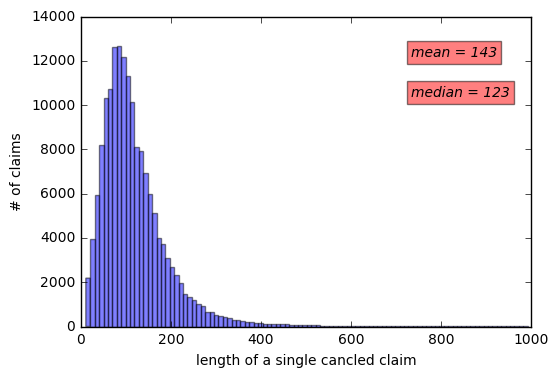

In [5]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import plotly.plotly as py  # tools to communicate with Plotly's server

fig = plt.figure()

num_bins = 100
# the histogram of the data
n, bins, patches = plt.hist(len_can, num_bins, facecolor='blue', alpha=0.5)
# add a 'best fit' line

plt.xlabel('length of a single cancled claim')
plt.ylabel('# of claims')
fig.text(0.7, 0.8, 'mean = 143', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':3})
fig.text(0.7, 0.7, 'median = 123', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':3})
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()
#plot_url = py.plot_mpl(fig, filename='/Users/mac/Desktop/histogram-mpl-legend')

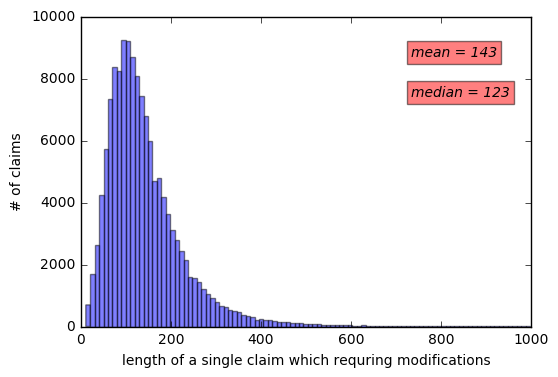

In [6]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import plotly.plotly as py  # tools to communicate with Plotly's server

fig = plt.figure()

num_bins = 100
# the histogram of the data
n, bins, patches = plt.hist(len_old, num_bins, facecolor='blue', alpha=0.5)
# add a 'best fit' line

plt.xlabel('length of a single claim which requring modifications')
plt.ylabel('# of claims')
fig.text(0.7, 0.8, 'mean = 143', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':3})
fig.text(0.7, 0.7, 'median = 123', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':3})
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()
#plot_url = py.plot_mpl(fig, filename='/Users/mac/Desktop/histogram-mpl-legend')

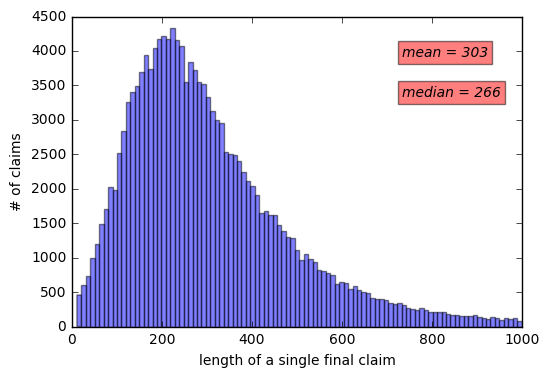

In [21]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import plotly.plotly as py  # tools to communicate with Plotly's server

fig = plt.figure()

num_bins = 100
# the histogram of the data
n, bins, patches = plt.hist(len_new, num_bins, facecolor='blue', alpha=0.5)
# add a 'best fit' line

plt.xlabel('length of a single granted claim')
plt.ylabel('# of claims')
fig.text(0.7, 0.8, 'mean = 303', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':3})
fig.text(0.7, 0.7, 'median = 266', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':3})
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()
#plot_url = py.plot_mpl(fig, filename='/Users/mac/Desktop/histogram-mpl-legend')

In [9]:
from nltk.corpus import stopwords
import re
from nltk.corpus import words
import csv
stop = set(stopwords.words('english'))

In [22]:

wordcount_new={}
for line in open('/Volumes/Zhipeng/patent_dataset/paired_newclaims_dep.txt',encoding='utf-8',errors='ignore'):
    for i in line.lower().split():
        i=re.sub('[^a-zA-Z]+', '', i)
# too slow if check i in words() or not
#        if i not in stop and i in words.words(): 
        if i not in stop and len(i)>0:
            if i not in wordcount_new:
                wordcount_new[i] = 1
            else:
                wordcount_new[i] += 1


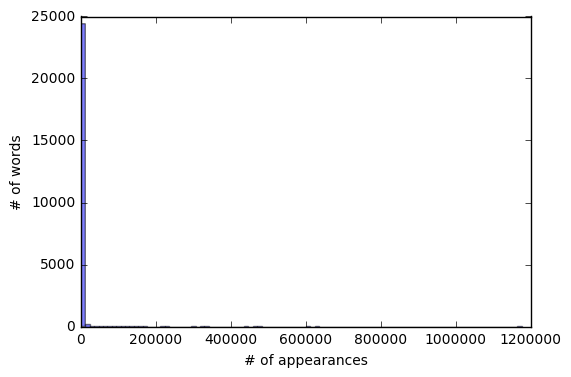

In [38]:
fig = plt.figure()
freq_new=[i for i in wordcount_new.values()]
num_bins = 100
# the histogram of the data
n, bins, patches = plt.hist(freq_new, num_bins, facecolor='blue', alpha=0.5)
# add a 'best fit' line

plt.xlabel('# of appearances')
plt.ylabel('# of words')
#fig.text(0.7, 0.8, 'mean = 303', style='italic',
#        bbox={'facecolor':'red', 'alpha':0.5, 'pad':3})
#fig.text(0.7, 0.7, 'median = 266', style='italic',
#        bbox={'facecolor':'red', 'alpha':0.5, 'pad':3})
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()
#plot_url = py.plot_mpl(fig, filename='/Users/mac/Desktop/histogram-mpl-legend')

In [11]:
wordcount={}
#for line in open('/Volumes/Zhipeng/patent_dataset/paired_oldclaims_dep.txt'):
for line in X_train_old+X_train_new+X_train_can:
    for i in line.lower().split():
        i=re.sub('[^a-zA-Z]+', '', i)
#        if i not in stop and i in words.words():
        if i not in stop and len(i)>0:
            if i not in wordcount:
                wordcount[i] = 1
            else:
                wordcount[i] += 1

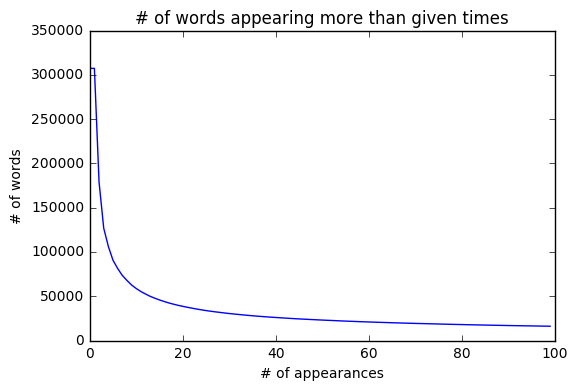

120407960

In [13]:
voc_size=[]
for i in range(100):
    temp=[j for j in wordcount_old.values() if j>=i]
    voc_size.append(len(temp))
plt.plot(voc_size)
plt.title('# of words appearing more than given times')
plt.xlabel('# of appearances')
plt.ylabel('# of words')
plt.show()
voc_size[30]
freq_=[i for i in wordcount_old.values()]
for i in wordcount_old.values():
    freq_.append(i)
sum(freq_)

In [18]:
voc_size[19]

39701

ImportError: dlopen(//anaconda/lib/python3.5/site-packages/cv2.cpython-35m-darwin.so, 2): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: /anaconda/lib/libopencv_imgcodecs.3.1.0.dylib
  Reason: Incompatible library version: libopencv_imgcodecs.3.1.dylib requires version 41.0.0 or later, but libpng16.16.dylib provides version 39.0.0